In [178]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [179]:
players = pd.read_csv('data/player_season.csv')
print(players.head())
print(players.describe())

  season_id     team_id team_abbreviation  gp   w   l  w_pct          min  \
0   2024-25  1610612752               NYK  57  36  21  0.632  1169.613333   
1   2023-24          -1               TOT  74  40  34  0.541  1623.753333   
2   2023-24  1610612752               NYK  49  32  17  0.653  1186.868333   
3   2023-24  1610612761               TOR  25   8  17  0.320   436.885000   
4   2022-23  1610612761               TOR  55  30  25  0.545  1140.520000   

   fgm  fga  fg_pct  fg3m  fg3a  fg3_pct  ftm  fta  ft_pct  oreb  dreb  reb  \
0  164  327   0.502    10    36    0.278   41   69   0.594   101   216  317   
1  235  469   0.501    26    97    0.268   69  112   0.616   191   296  487   
2  157  299   0.525    13    50    0.260   45   70   0.643   141   210  351   
3   78  170   0.459    13    47    0.277   24   42   0.571    50    86  136   
4  196  404   0.485    29   108    0.269   87  124   0.702   100   228  328   

   ast  tov  stl  blk  blka   pf  pfd  pts  plus_minus  nba_fa

In [180]:
print(players.isnull().sum())

season_id            0
team_id              0
team_abbreviation    0
gp                   0
w                    0
l                    0
w_pct                0
min                  0
fgm                  0
fga                  0
fg_pct               0
fg3m                 0
fg3a                 0
fg3_pct              0
ftm                  0
fta                  0
ft_pct               0
oreb                 0
dreb                 0
reb                  0
ast                  0
tov                  0
stl                  0
blk                  0
blka                 0
pf                   0
pfd                  0
pts                  0
plus_minus           0
nba_fantasy_pts      0
dd2                  0
td3                  0
player_id            0
season_start         0
season_end           0
dtype: int64


find null or missing values 

0       2024-25
1       2023-24
2       2023-24
3       2023-24
4       2022-23
         ...   
3632    2018-19
3633    2018-19
3634    2018-19
3635    2017-18
3636    2016-17
Name: season_id, Length: 3637, dtype: object
0       NYK
1       TOT
2       NYK
3       TOR
4       TOR
       ... 
3632    TOT
3633    MIN
3634    PHI
3635    PHI
3636    PHI
Name: team_abbreviation, Length: 3637, dtype: object
Axes(0.125,0.11;0.775x0.77)


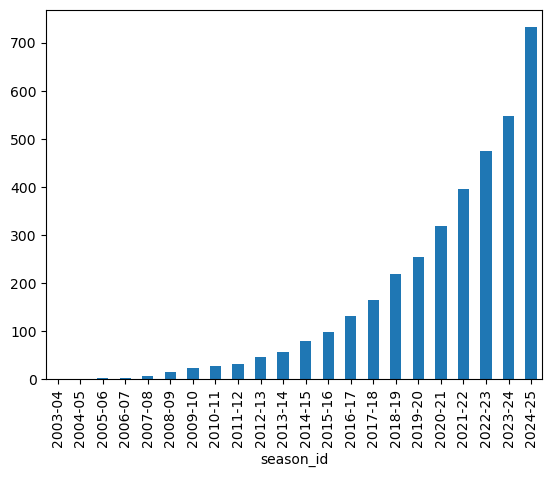

In [181]:
categorical = players.select_dtypes(include=['object'])
season_ids,team_abbrev = categorical['season_id'],categorical['team_abbreviation']
print(season_ids)
print(team_abbrev)
# plot value counts of season id
season_counts = season_ids.value_counts().sort_index()
season_plt = season_counts.plot(kind='bar')
# plot value counts of team abbrev
team_counts = team_abbrev.value_counts().sort_index()
# team_plt = team_counts.plot(kind='bar')
print(season_plt)

get range and visualize frequency using a bar plot 

In [182]:
nop_players = players[players['team_abbreviation'] == 'NOP'] # get all players playing for the pelicans
unique_nop_players = nop_players['player_id'].nunique()
print(unique_nop_players)

46


check unusual values 

In [183]:
numerical = players.select_dtypes(include=['int64', 'float64']).copy()
numerical.describe()
# convert everything to per-game stats
exclude = numerical.columns.to_list()[:6] + [i for i in numerical.columns.to_list() if i.endswith('_pct')] + numerical.columns.to_list()[26:]
include = [i for i in numerical.columns.to_list() if i not in exclude]
for stat in include:
    numerical[f'{stat}_per_game'] = numerical[stat] / numerical['gp']
    players[f'{stat}_per_game'] = players[stat] / players['gp']
    
numerical.drop(columns=include, inplace=True)
players.drop(columns=include, inplace=True)
print(numerical.columns)
    

Index(['team_id', 'gp', 'w', 'l', 'w_pct', 'min', 'fg_pct', 'fg3_pct',
       'ft_pct', 'plus_minus', 'nba_fantasy_pts', 'dd2', 'td3', 'player_id',
       'season_start', 'season_end', 'fgm_per_game', 'fga_per_game',
       'fg3m_per_game', 'fg3a_per_game', 'ftm_per_game', 'fta_per_game',
       'oreb_per_game', 'dreb_per_game', 'reb_per_game', 'ast_per_game',
       'tov_per_game', 'stl_per_game', 'blk_per_game', 'blka_per_game',
       'pf_per_game', 'pfd_per_game', 'pts_per_game'],
      dtype='object')


In [184]:
# group players based on the amount of points, assists, rebounds, steals, etc
n_avg = numerical.groupby('player_id').mean().sort_index()
numerical.head()
print(n_avg[n_avg["team_id"] == -1].shape[0])
print(n_avg[n_avg["team_id"] == -1].shape[0]/len(n_avg))
numerical.drop(numerical[numerical["team_id"] == -1].index, inplace=True)


0
0.0


Index(['team_id', 'gp', 'w', 'l', 'w_pct', 'min', 'fg_pct', 'fg3_pct',
       'ft_pct', 'plus_minus', 'nba_fantasy_pts', 'dd2', 'td3', 'player_id',
       'season_start', 'season_end', 'fgm_per_game', 'fga_per_game',
       'fg3m_per_game', 'fg3a_per_game', 'ftm_per_game', 'fta_per_game',
       'oreb_per_game', 'dreb_per_game', 'reb_per_game', 'ast_per_game',
       'tov_per_game', 'stl_per_game', 'blk_per_game', 'blka_per_game',
       'pf_per_game', 'pfd_per_game', 'pts_per_game'],
      dtype='object')


Text(0.5, 0, 'PPG')

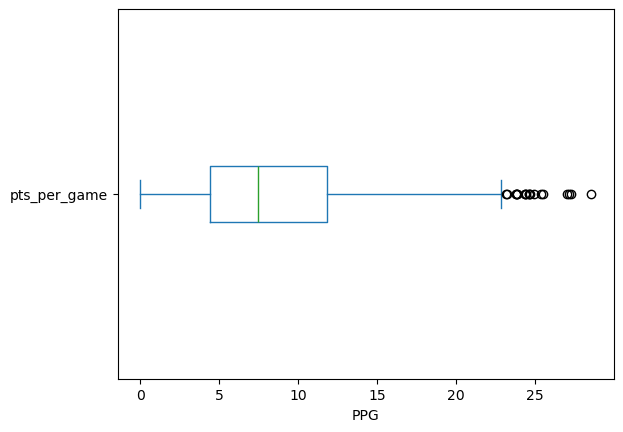

In [185]:
# check for distrobution of points
print(numerical.columns)
per_game = n_avg.iloc[:,15:]
ppg = per_game['pts_per_game']
ppg.plot(kind='box',vert=False).set_xlabel('PPG')

box plot shows the distribution of ppg within entire dataset

In [186]:

q_98 = ppg.quantile(0.98)
# get all high scoring players
high_scorers = numerical[numerical['pts_per_game'] > q_98]
sampled_players = high_scorers.sample(5, random_state=42)
# w_pct, fg_pct, plus_minus, nba_fantasy_points, td3,dd, fgm, o_reb




                  team_id        gp         w         l     w_pct       min  \
team_id          1.000000  0.081554  0.540924 -0.584167  0.614223  0.084531   
gp               0.081554  1.000000  0.578346  0.161317  0.190399  0.987757   
w                0.540924  0.578346  1.000000 -0.711810  0.910781  0.476439   
l               -0.584167  0.161317 -0.711810  1.000000 -0.937888  0.274058   
w_pct            0.614223  0.190399  0.910781 -0.937888  1.000000  0.075495   
min              0.084531  0.987757  0.476439  0.274058  0.075495  1.000000   
fg_pct           0.847561  0.579921  0.647437 -0.283942  0.490880  0.597507   
fg3_pct         -0.075522  0.538747 -0.195374  0.700199 -0.495451  0.655785   
ft_pct          -0.617270  0.606894  0.246314  0.224539 -0.009474  0.555694   
plus_minus       0.408364  0.424632  0.965440 -0.802345  0.945542  0.297531   
nba_fantasy_pts  0.415555  0.764281  0.858451 -0.380487  0.638529  0.683332   
dd2              0.080084  0.116970  0.601172 -0.626